In [65]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import os
import librosa

In [66]:
path = "./Audio"

try:
    # List all files in the directory
    files = os.listdir(path)
    # Filter to include only .wav files
    wav_files = [f for f in files if f.endswith('.wav')]    
except FileNotFoundError:
    print(f"The directory {path} was not found. Please check the path and try again.")


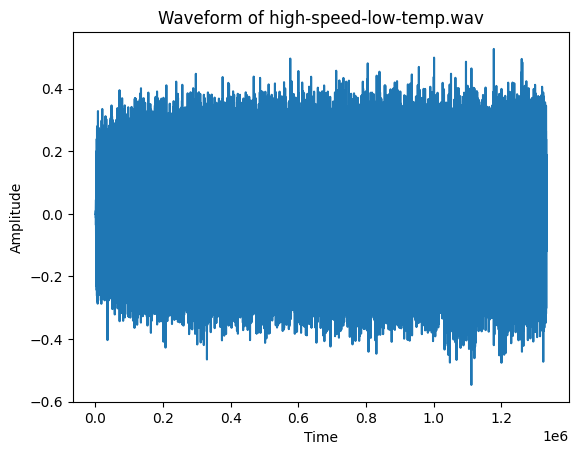

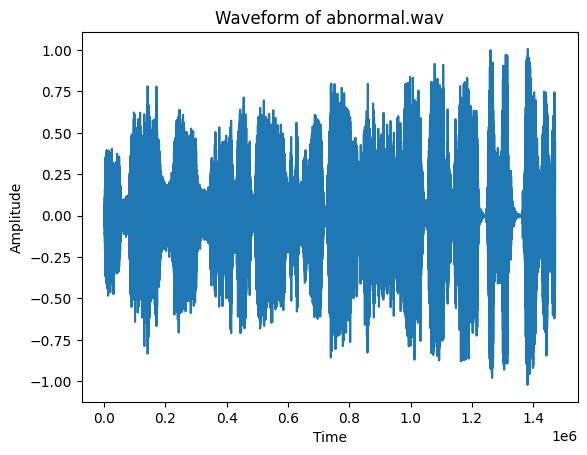

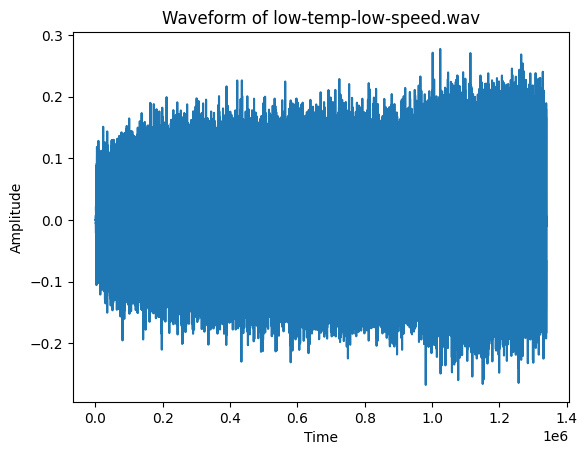

In [67]:
for files in wav_files:
    y, sample_rate = librosa.load(path + '/' + files)
    # Plot the audio waveform
    plt.figure()
    plt.plot(y)
    plt.title(f"Waveform of {files}")
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.show()

In [68]:
def extract_features(file_path):
    y, sr = librosa.load(path + '/'  + file_path, sr=None)
    
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfccs_mean = np.mean(mfccs.T, axis=0)
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
    zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y))
    spectral_contrast = np.mean(librosa.feature.spectral_contrast(y=y, sr=sr))
    rmse = np.mean(librosa.feature.rms(y=y))
    feature_vector = np.hstack([mfccs_mean, spectral_centroid, spectral_bandwidth, spectral_rolloff, zero_crossing_rate, spectral_contrast, rmse])
    return feature_vector

In [69]:
# Labels: 0 for normal, 1 for abnormal
labels = [0, 1, 0]

# Extract features from each audio file
features = [extract_features(file) for file in wav_files]
X = np.array(features)
y = np.array(labels)

In [70]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [71]:
from sklearn.svm import OneClassSVM

model = OneClassSVM(kernel='rbf', gamma='auto', nu=0.1)  # Adjust nu to control the sensitivity
model.fit(X)

OneClassSVM(gamma='auto', nu=0.1)

In [72]:
y_pred = model.predict(X)
y_pred = np.where(y_pred == 1, 0, 1)  # Convert 1 to 0 (normal), -1 to 1 (abnormal)


In [73]:
print("Predicted labels:", y_pred)
print(classification_report(labels, y_pred, zero_division=0))


Predicted labels: [0 1 0]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



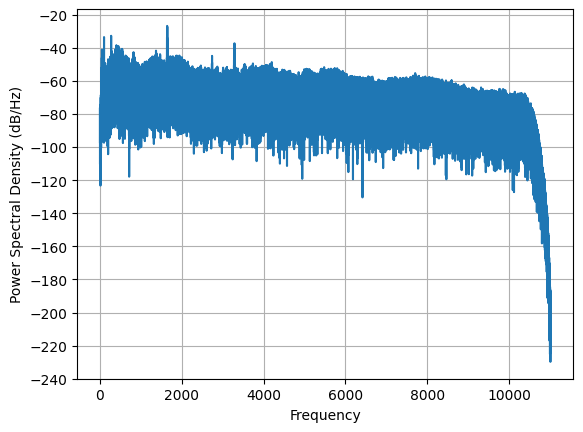

In [78]:
y,fs = librosa.load(path + '/' + wav_files[0])
plt.psd(y,NFFT=len(y),Fs=fs)
plt.show()

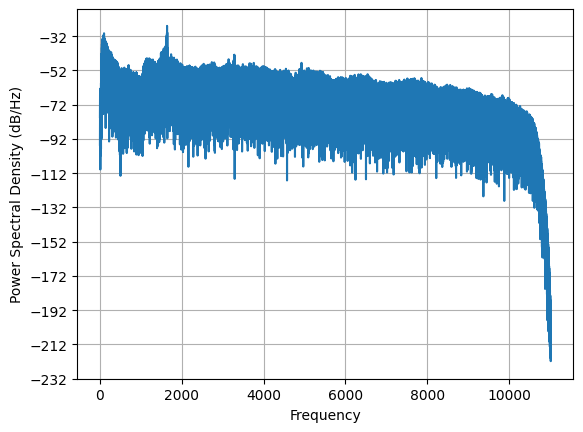

In [79]:
y,fs = librosa.load(path + '/' + wav_files[1])
plt.psd(y,NFFT=len(y),Fs=fs)
plt.show()

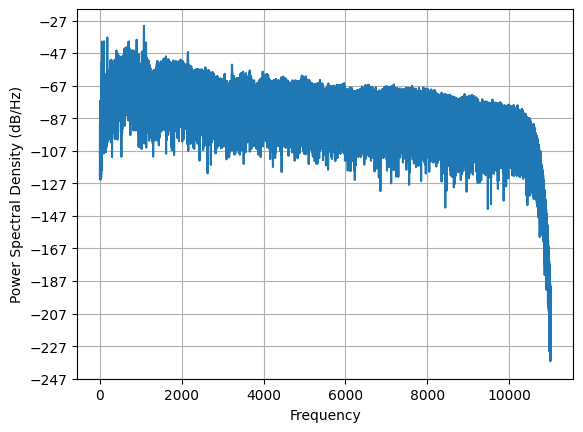

In [80]:
y,fs = librosa.load(path + '/' + wav_files[2])
plt.psd(y,NFFT=len(y),Fs=fs)
plt.show()